# Fashion MNIST
ref : https://www.tensorflow.org/tutorials/keras/classification?hl=ko

In [1]:
# coding: utf-8

import sys 
import os
sys.path.append(os.pardir)  # 부모 디렉터리의 파일을 가져올 수 있도록 설정

import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense, Input, Conv2D, MaxPooling2D, Dropout, Flatten
from keras.utils import to_categorical
from keras.datasets import fashion_mnist
from keras.callbacks import EarlyStopping, ModelCheckpoint

from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.model_selection import train_test_split

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings(action='ignore')

In [2]:
np.random.seed(121)
tf.random.set_seed(121)

In [3]:
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

4423680/4422102 [==============================] - 0s 0us/step


In [4]:
print(train_images.shape, len(train_labels), train_labels[:5])
print(test_images.shape, len(test_labels), test_labels[:5])

(60000, 28, 28) 60000 [9 0 0 3 0]
(10000, 28, 28) 10000 [9 2 1 1 6]


# 공통 변수 설정

In [5]:
SPLIT__=0.1
BATCH_SIZE__=128
EPOCHS__=10

* target 

In [6]:
print(set(train_labels))
NUM_CLASSES__ = len(set(train_labels))
print(NUM_CLASSES__)

{0, 1, 2, 3, 4, 5, 6, 7, 8, 9}
10


* 보기 편하려고 만든 레이블

In [7]:
LABEL_NAME__ = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

# 공통 함수

In [8]:
def myPlot(fit_res) :
    key_ = list(fit_res.history.keys())
    plt.figure(figsize=(12,5))
    for i in range(len(key_)):
        plt.plot(fit_res.history[key_[i]], label=key_[i])
    plt.title("metrics")
    plt.xlabel("epoch")
    plt.ylabel("score")
    plt.legend()
    plt.show()

In [9]:
def myscore(X,y,fit_res=None):
    # test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=1)
    # print(f"loss: {test_loss:.5f} accuracy: {test_acc:.5f}" )
    history = model.evaluate(X,  y, verbose=1)
    print(f"loss: {history[0]:.5f} accuracy: {history[1]:.5f}" )
    if fit_res != None:
        myPlot(fit_res)
# myscore(test_images,  test_labels, fit_res)

In [10]:
def myfit(X, y, SPLIT__=0.1, BATCH_SIZE__=128, EPOCHS__=10, ):
    fit_res = model.fit(X, y, batch_size=BATCH_SIZE__, epochs=EPOCHS__, validation_split=SPLIT__)
    return fit_res

In [11]:
def mypredit_check(test_X, idx=0):
    pred = model.predict(test_X)
    print(pred[idx])
    pred_label = np.argmax(pred[idx])
    print(pred_label, LABEL_NAME__[pred_label])
    plt.imshow(test_X[idx])
    plt.show()

# EDA

* visualization sample image

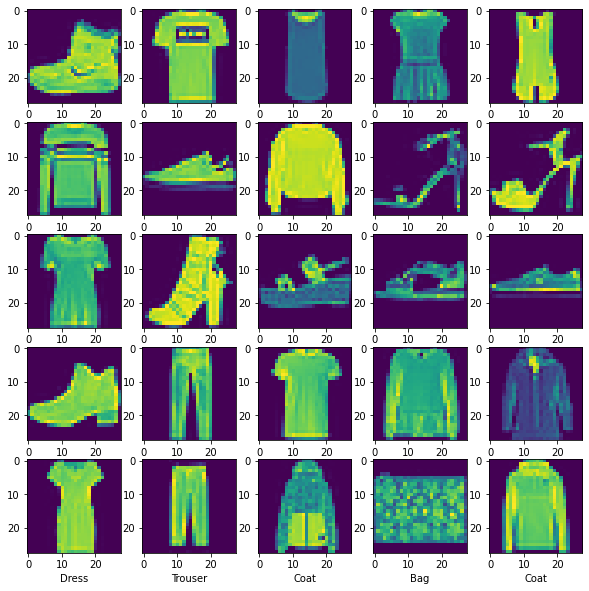

In [12]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.grid(False)
    plt.imshow(train_images[i])
    plt.xlabel(LABEL_NAME__[train_labels[i]])
plt.show()

# Preprocessing

* scaling

In [13]:
train_images = train_images / 255.0
test_images = test_images / 255.0

* reshape 에러 주의!!!!
<pre>
import numpy as np
data = np.zeros(2352)              # 2352 is 784 x 3
data = data.reshape((-1,28,28,1))  # [3,1,28,28]
print(data.shape)
data = np.zeros(9992)              # 9992 is 784 x 12.745 ... not integer divisible
data = data.reshape((-1,28,28,1))  # throws ValueError
</pre>

In [14]:
train_images = train_images.reshape(-1, 28, 28, 1)
test_images = test_images.reshape(-1, 28, 28, 1)
print(train_images.shape, len(train_labels), train_labels[:5])
print(test_images.shape, len(test_labels), test_labels[:5])

(60000, 28, 28, 1) 60000 [9 0 0 3 0]
(10000, 28, 28, 1) 10000 [9 2 1 1 6]


* 방법2 ) categorical_crosseentropy

In [15]:
train_labels_cate = to_categorical(train_labels, NUM_CLASSES__)  # 원-핫 인코딩. 1차원 -> 2차원
test_labels_cate = to_categorical(test_labels, NUM_CLASSES__)

print(train_labels_cate.shape)  # (60000, 10)
print(train_labels_cate[:3])

(60000, 10)
[[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]


# CNN Model Build & Fit 

In [16]:
input_shape = (28,28,1) #-----------------------------------★★★ 주의(Width, Height, Channel)
model = Sequential( [
        Conv2D(32, kernel_size=(3, 3), input_shape=input_shape, activation="relu"),
        MaxPooling2D(pool_size=(2, 2)),
        Conv2D(64, kernel_size=(3, 3), activation="relu"),
        MaxPooling2D(pool_size=(2, 2)),
        Flatten(),
        Dense(128, activation='relu'),
        Dropout(0.5),
        Dense(NUM_CLASSES__, activation="softmax")
        ] )
model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])
print(model.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
flatten (Flatten)            (None, 1600)              0         
_________________________________________________________________
dense (Dense)                (None, 128)               204928    
_________________________________________________________________
dropout (Dropout)            (None, 128)               0

In [17]:
# 모델 저장 폴더
import os
if not os.path.exists("./model"):
    os.mkdir('./model')

filepath = "./model/{epoch:02d}{val_loss:.3f}.h5"
checkpnt = ModelCheckpoint(filepath, monitor='val_loss', save_best_only=True)
estop = EarlyStopping(monitor='val_loss', patience=4)


In [18]:
fit_res = model.fit(train_images, train_labels_cate, callbacks = [checkpnt,estop], batch_size=BATCH_SIZE__, epochs=20, validation_split=SPLIT__ )


Epoch 1/20
422/422 [==============================] - 9s 10ms/step - loss: 0.9767 - accuracy: 0.6563 - val_loss: 0.4073 - val_accuracy: 0.8507
Epoch 2/20
422/422 [==============================] - 4s 8ms/step - loss: 0.4529 - accuracy: 0.8400 - val_loss: 0.3416 - val_accuracy: 0.8693
Epoch 3/20
422/422 [==============================] - 4s 9ms/step - loss: 0.3774 - accuracy: 0.8644 - val_loss: 0.3128 - val_accuracy: 0.8842
Epoch 4/20
422/422 [==============================] - 4s 9ms/step - loss: 0.3464 - accuracy: 0.8758 - val_loss: 0.2970 - val_accuracy: 0.8852
Epoch 5/20
422/422 [==============================] - 4s 9ms/step - loss: 0.3196 - accuracy: 0.8839 - val_loss: 0.2830 - val_accuracy: 0.8947
Epoch 6/20
422/422 [==============================] - 4s 9ms/step - loss: 0.2987 - accuracy: 0.8932 - val_loss: 0.2799 - val_accuracy: 0.8930
Epoch 7/20
422/422 [==============================] - 4s 9ms/step - loss: 0.2898 - accuracy: 0.8940 - val_loss: 0.2677 - val_accuracy: 0.8965
Epoch

313/313 [==============================] - 1s 3ms/step - loss: 0.2564 - accuracy: 0.9159
loss: 0.25638 accuracy: 0.91590


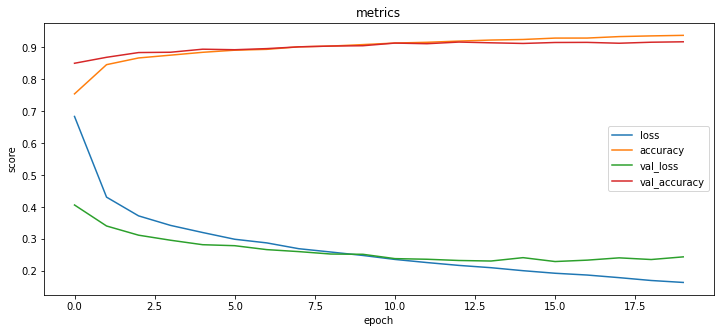

In [19]:
myscore(test_images,  test_labels_cate, fit_res)

# 예측모델 서비스

#### 방법1) 임의의 test_images로 테스트

(1, 28, 28, 1)
[1.3031509e-16 1.3218258e-16 2.4130736e-15 4.3190289e-17 1.1287160e-18
 5.3627932e-08 4.5541383e-16 3.3716564e-08 8.0934320e-15 9.9999988e-01]
9 Ankle boot


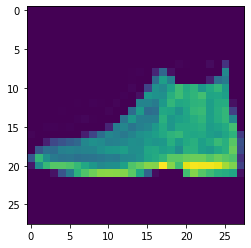

In [20]:
img = (np.expand_dims(test_images[0],0))
print(img.shape)
mypredit_check(test_images, idx=0)

### 방법2) test_images FileUpload

In [27]:
import ipywidgets as widgets
myupload = widgets.FileUpload(
    accept= '.png', 
    multiple=True  
)
myupload

FileUpload(value={}, accept='.png', description='Upload', multiple=True)

['test_sneaker_3.png']
(28, 28, 1)
(1, 28, 28, 1)
[8.8246389e-11 9.1709411e-11 4.8069804e-10 6.4217458e-11 7.5489230e-14
 8.4509775e-06 5.3191473e-10 2.3811572e-05 2.3115848e-10 9.9996769e-01]
9 Ankle boot


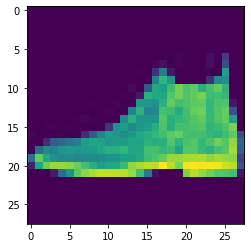

In [28]:
from PIL import Image  
import io
from keras.preprocessing.image import img_to_array

uploaded_filename = list(myupload.value)
print(uploaded_filename)

for i, fname in enumerate(uploaded_filename):
    content = myupload.value[uploaded_filename[i]]['content']
    upload_img = Image.open(io.BytesIO(content)).resize((28, 28))   
    plt.imshow(upload_img)
    
    upload_img = np.array(upload_img)[:, :, 1].reshape(28,28,1) / 255.0
    print(upload_img.shape)
    upload_img = (np.expand_dims(upload_img,0))
    print(upload_img.shape)
    mypredit_check(upload_img)